<a href="https://colab.research.google.com/github/MLS2005/MLB-Classroom-repo/blob/main/project_2_mnist_nn_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification with Neural Networks

## Introduction

Welcome to the second MLB project! In this notebook, we'll build a **Neural Network** to recognize handwritten digits from the famous MNIST dataset.

### What is MNIST?
MNIST (Modified National Institute of Standards and Technology) is a dataset containing 70,000 images of handwritten digits (0-9). Each image is 28x28 pixels in grayscale.

### What Will We Learn?
- How to load and explore image data
- How to preprocess data for neural networks
- How to build a neural network from scratch
- How to train and evaluate our model
- How to make predictions on new data

Let's get started! 🚀

## Step 1: Import Required Libraries

We'll need several libraries for this project:
- **numpy**: For numerical operations and array manipulation
- **pandas**: For data organization and analysis
- **matplotlib & seaborn**: For creating visualizations
- **tensorflow/keras**: For building our neural network
- **sklearn**: For splitting data and evaluation metrics

In [24]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For neural network building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# For data preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Set visualization style. We use these libraries to build graphs, as visualizing the data is often
# an important step in ML!
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed for reproducibility. All this is doing is making sure we select the random sequences in a
# way that can be reproduced again so we can compare results.
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


## Step 2: Load the MNIST Dataset

The MNIST dataset comes pre-loaded with Keras, making it easy to access. We'll load both training and test data!


In [25]:
# Load MNIST dataset from Keras
# This automatically splits the data into training and testing sets, so you don't have to do that manually yourself!
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


# -- TODO --

# Print out the datasets shape here, including the training and testing sets. This is an important step because the dataset's
# shape, or the number of samples and the dimensions it spans is very important to know. For example, remember that the input
# layer of our NN has to match the number of pixels in our image! You would not be able to tell this if you didn't know
# the shape of the data you are working with.

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:",  X_test.shape)
print("y_test shape:",  y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Step 3: Explore the Data

Before building our model, let's understand what we're working with. We'll:
1. Check the distribution of digits in our dataset
2. Visualize some example images
3. Examine pixel value ranges

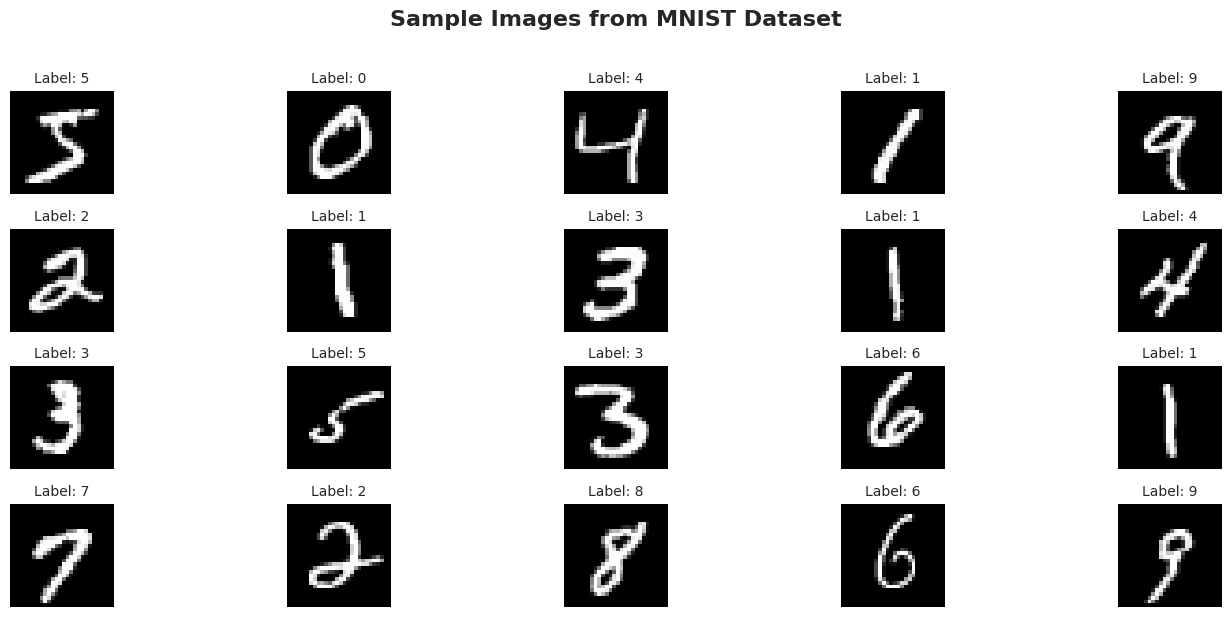

In [26]:
# Here are some cool visualizations we can do with the data to see the distribution of digits in our dataset.
# Data visualization is another cool part of ML and gives us a powerful visual of the data we are working with.
# We gave you an example of this, but feel free to add a cell below here to explore things such as the distrubution
# of numbers, etc! Let your curiosity take over.


plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}', fontsize=10)
    plt.axis('off')

plt.suptitle('Sample Images from MNIST Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Step 4: Data Preprocessing

Neural networks work best when data is properly prepared. We'll perform three key preprocessing steps:

### 4.1 Normalization
We'll scale pixel values from [0, 255] to [0, 1]. This helps the neural network learn faster and more effectively.

**Why normalize?**
- Neural networks work better with smaller values
- It prevents certain features from dominating others
- It helps the model converge faster during training. This is because it won't have to deal with the more complicated calculations! Binary ones allow us to speed up the training and makes things a little simpler.

In [27]:
# Right now, all of the images have pixel values between 0 and 255. We want to change this!

# -- TODO --
# Normalize all the pixel values, so that they are between 0 and 1. (HINT: Take the X_train and X_test values and divide them by 255.0! Make sure
# to cast these as different variables, so you don't them mixed up!)

X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print("Before normalization: min =", X_train.min(), ", max =", X_train.max())
print("After normalization:  min =", X_train_normalized.min(), ", max =", X_train_normalized.max())



Before normalization: min = 0 , max = 255
After normalization:  min = 0.0 , max = 1.0


### 4.2 One-Hot Encoding

Our labels, or what we are predicing, are currently numbers (0-9). This makes sense right, after all, the point of the NN is to convert an image ot a number between 0-9. However, we need to convert them to what are called **one-hot encoded** vectors.

This is because we need the labels, or what is predicted, to match the output format of the NN. If you remember in the NN MLB, we told you that if we are predicted 10 digits, we needed the final layer of the NN to have 10 nodes! By making sure the labels are encoded, we make sure to give the NN a clear format to predict.

Here is a great short video to learn a little more about this: https://www.youtube.com/watch?v=G2iVj7WKDFk

**Example:**
- Label 3 becomes: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
- Label 7 becomes: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

**Why one-hot encode?**
- Neural networks output probabilities for each class
- It prevents the model from thinking there's an ordinal relationship between digits
- It matches the output format of our neural network

In [28]:
# -- TODO --

# Convert the labels, or the y_train and y_test values using one-hot encoding! (HINT: use the to_categorical() method)
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("Original y_train shape:", y_train.shape)
print("After one-hot encoding:", y_train_encoded.shape)

print("\nFirst label before encoding:", y_train[0])
print("First label after encoding:", y_train_encoded[0])

Original y_train shape: (60000,)
After one-hot encoding: (60000, 10)

First label before encoding: 5
First label after encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 4.3 Data Reshaping

Our images are currently 28x28, or a 2D, matrices. For a basic neural network, we need to flatten them into a huge 1D vector of 784 pixels (28 × 28 = 784). Remember, this is what is going into the input layer of the NN!

In [29]:
# -- TODO --

# Use your normalized X_train and X_test arrays and use the ".reshape()" method to change these arrays into a 1D vector
# with a size of 28 * 28. Make sure to cast these as new variables!

X_train_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], 28 * 28)
X_test_flattened  = X_test_normalized.reshape(X_test_normalized.shape[0], 28 * 28)

print("X_train_flattened shape:", X_train_flattened.shape)
print("X_test_flattened shape:",  X_test_flattened.shape)

print("\nBefore flattening:", X_train_normalized[0].shape)
print("After flattening:",  X_train_flattened[0].shape)

X_train_flattened shape: (60000, 784)
X_test_flattened shape: (10000, 784)

Before flattening: (28, 28)
After flattening: (784,)


## Step 5: Build the Neural Network

Now comes the exciting part - building our neural network!

### Architecture Overview:
Our neural network will have:
1. **Input Layer**: 784 neurons (one for each pixel)
2. **Hidden Layer 1**: 128 neurons with ReLU activation
3. **Dropout Layer**: Prevents overfitting (20% dropout). Don't worry too much about this, it's just good practice to use dropout to prevent our NN from memorizing the data instead of patterns in the data.
4. **Hidden Layer 2**: 64 neurons with ReLU activation
5. **Output Layer**: 10 neurons with Softmax activation (one for each digit). Softmax is an activation function, much like ReLU that gives us a probability distribution of which of the 10 digits our image could be!

### Key Concepts:
- **ReLU (Rectified Linear Unit)**: Activation function that introduces non-linearity
- **Dropout**: Randomly turns off neurons during training to prevent overfitting
- **Softmax**: Converts output to probabilities that sum to 1

In [30]:
# -- TODO --

# Build the neural network architecture! Define a variable called "model" (for convention, but you can call it whatever of course!)
# Use a "Sequential" model class to build out the NN. Make sure to include 3 layers in the following format:
# Dense -> Dropout -> Dense -> Dense.

# We'll leave it up to you to figure out the input shape and sizes! Definetely feel free to seek out some help building the model
# out, it can be a bit tricky at first!

model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Understanding the Model Summary:

- **Param #**: Total number of learnable parameters (weights and biases)
- **Output Shape**: Dimensions of data after each layer
- Layer 1: 784 inputs × 128 outputs + 128 biases = 100,480 parameters
- Layer 2: 128 inputs × 64 outputs + 64 biases = 8,256 parameters
- Output: 64 inputs × 10 outputs + 10 biases = 650 parameters

**Total**: ~109K parameters that the model will learn!

## Step 6: Compile the Model

Before training, we need to configure the learning process by specifying:

1. **Optimizer**: Algorithm that updates weights (Adam - adaptive learning rate)
2. **Loss Function**: How we measure model performance (categorical crossentropy)
3. **Metrics**: What we track during training (accuracy)

In [31]:
# Now that we have build out our model, we can compile it with optimizer, loss function, and metrics.
# These are just aspects of our model that will help us train the model more accurately and are
# needed!
model.compile(
    optimizer='adam',                      # Adaptive learning rate optimizer
    loss='categorical_crossentropy',       # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)


## Step 7: Train the Model

Now we'll train our neural network! During training:
- The model learns patterns from the training data
- We validate on a portion of data to prevent overfitting
- We track loss and accuracy over multiple epochs

**Hyperparameters:**
- **Epochs**: Number of complete passes through the training data (15)
- **Batch Size**: Number of samples processed before updating weights (128)
- **Validation Split**: Percentage of training data used for validation (20%)

In [32]:
# -- TODO --

# Now comes the final part! We're finally ready to train our model. For our purposes, we can use ~15 epochs, or the number of
# training iterations, a batch size of ~128 and a validation split of 0.2, which means that we can use 20% for validating, which
# is basically checking our model as it trains to check for overfitting. We don't usually learn from this, it's just something for us
# to keep track.

history = model.fit(
    X_train_flattened,
    y_train_encoded,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7789 - loss: 0.7476 - val_accuracy: 0.9478 - val_loss: 0.1803
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9393 - loss: 0.2038 - val_accuracy: 0.9603 - val_loss: 0.1327
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9549 - loss: 0.1497 - val_accuracy: 0.9661 - val_loss: 0.1123
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9656 - loss: 0.1152 - val_accuracy: 0.9709 - val_loss: 0.0981
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9695 - loss: 0.0979 - val_accuracy: 0.9713 - val_loss: 0.0936
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9735 - loss: 0.0854 - val_accuracy: 0.9741 - val_loss: 0.0864
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9774 - loss: 0.0721 - val_accuracy: 0.9756 - val_loss: 0.0851
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9797 - loss: 0.0629 - val_accuracy: 

## Step 8: Visualize Training History

Let's see how our model performed during training by plotting:
1. **Accuracy**: How often the model predicts correctly
2. **Loss**: How far predictions are from actual values

**What to look for:**
- Training and validation curves should be close together
- Both should improve over time
- Large gaps indicate overfitting

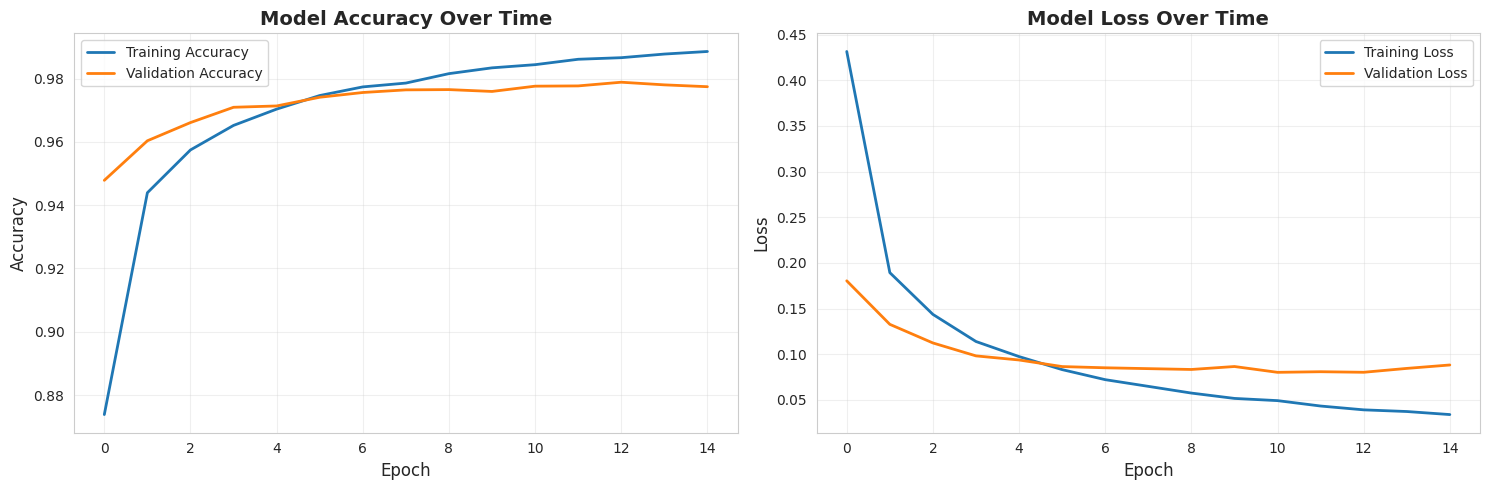


📊 Final Training Accuracy: 0.9885 (98.85%)
📊 Final Validation Accuracy: 0.9774 (97.74%)


In [33]:
# Here, we've given you a couple of graphs to help you see the model as it trained over time! (NOTE: the variable "history" just refers
# to the model itself, you might have called it something different).

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print final training metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"\n📊 Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"📊 Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")

## Step 9: Evaluate Model Performance

Let's test our model on completely unseen data (test set) to see how well it generalizes.

We'll calculate:
- **Overall accuracy**
- **Loss value**

In [34]:
# -- TODO --
# Now that we've trained our model and the accuracy (hopefully) looks promising, let's test our model on our test set of data now.
# HINT: Use the .evalutate() method to evaluate the model on the testing dataset.

test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_encoded, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0893


In [35]:
# -- TODO --

# Now, let's make predictions using our model on the 1D flattened testing values. All you are doing here is using your trained
# model to make predictions on the X_test flattened array.

y_pred_probs = model.predict(X_test_flattened)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confirm output shapes and preview results
print("y_pred_probs shape:", y_pred_probs.shape)
print("y_pred shape:", y_pred.shape)

# Show example predictions
print("\nSample predictions:", y_pred[:10])
print("Actual labels:      ", y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
y_pred_probs shape: (10000, 10)
y_pred shape: (10000,)

Sample predictions: [7 2 1 0 4 1 4 9 6 9]
Actual labels:       [7 2 1 0 4 1 4 9 5 9]


## Step 10: Visualize Predictions

Let's see our model in action! We'll display:
1. Sample images from the test set
2. Model's predictions
3. Actual labels
4. Prediction confidence

We've provided these for you, but note that the variable names might be different here!

This part has been completed for you and is not graded!


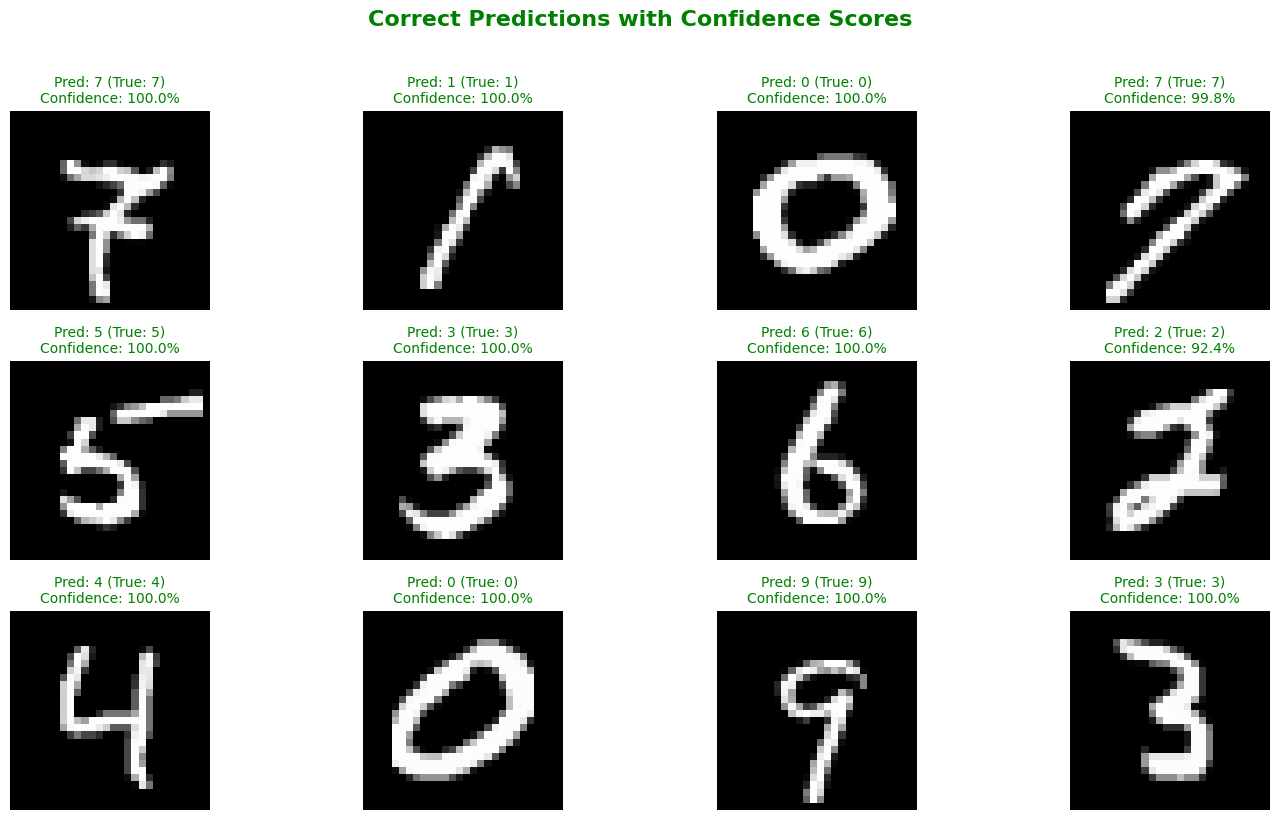

In [36]:
# Visualize correct predictions. Again, our variables for y_pred and y_test might be different from yours, just be aware!
correct_indices = np.where(y_pred == y_test)[0]
sample_correct = np.random.choice(correct_indices, 12, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_correct):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    confidence = y_pred_probs[idx][y_pred[idx]] * 100
    plt.title(f'Pred: {y_pred[idx]} (True: {y_test[idx]})\nConfidence: {confidence:.1f}%',
              fontsize=10, color='green')
    plt.axis('off')

plt.suptitle('Correct Predictions with Confidence Scores',
             fontsize=16, fontweight='bold', color='green', y=1.02)
plt.tight_layout()
plt.show()

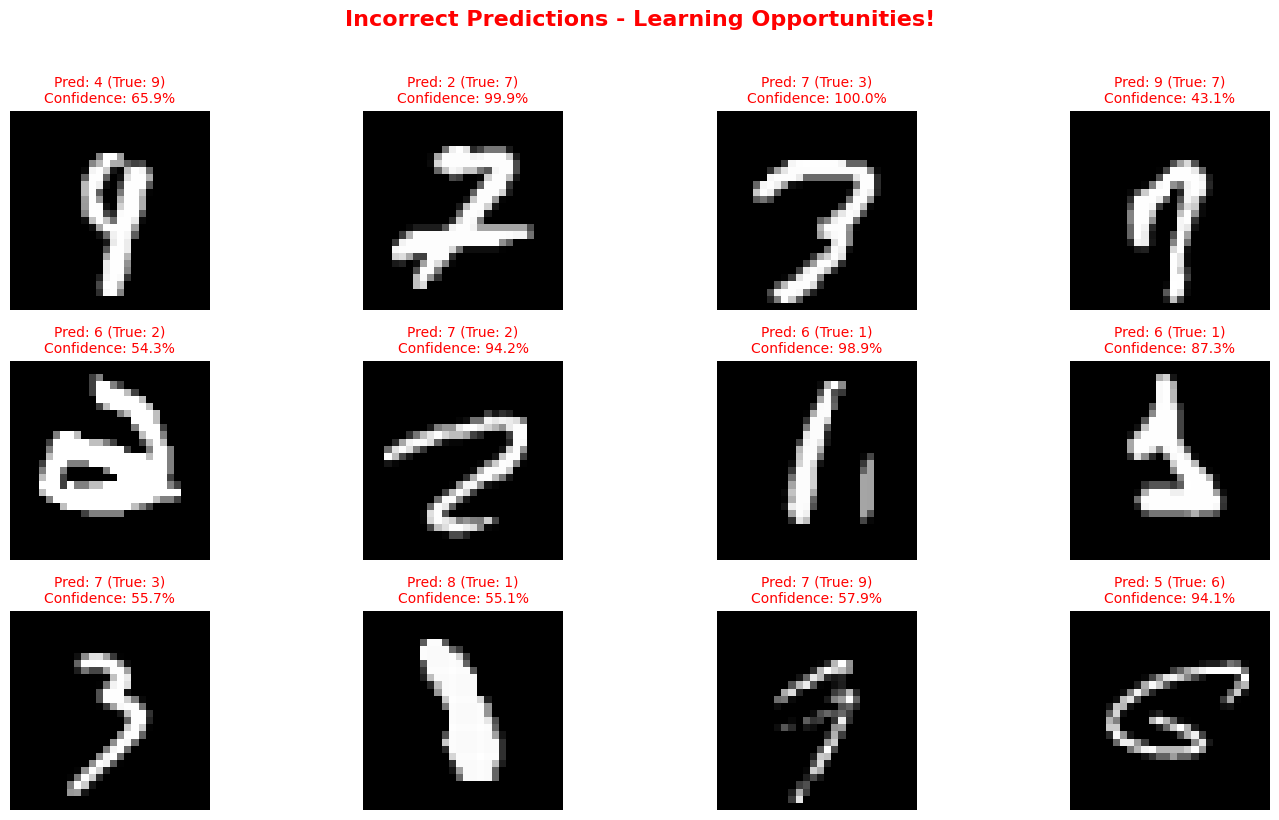


💡 Total misclassifications: 197 out of 10000
Error rate: 1.97%


In [37]:
# Visualize incorrect predictions
incorrect_indices = np.where(y_pred != y_test)[0]

if len(incorrect_indices) > 0:
    sample_incorrect = np.random.choice(incorrect_indices,
                                       min(12, len(incorrect_indices)),
                                       replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(sample_incorrect):
        plt.subplot(3, 4, i + 1)
        plt.imshow(X_test[idx], cmap='gray')
        confidence = y_pred_probs[idx][y_pred[idx]] * 100
        plt.title(f'Pred: {y_pred[idx]} (True: {y_test[idx]})\nConfidence: {confidence:.1f}%',
                  fontsize=10, color='red')
        plt.axis('off')

    plt.suptitle('Incorrect Predictions - Learning Opportunities!',
                 fontsize=16, fontweight='bold', color='red', y=1.02)
    plt.tight_layout()
    plt.show()

    print(f"\n💡 Total misclassifications: {len(incorrect_indices)} out of {len(y_test)}")
    print(f"Error rate: {len(incorrect_indices)/len(y_test)*100:.2f}%")
else:
    print("\n🎉 Wow! Perfect predictions on all test samples!")

## Step 11: Interactive Prediction

Try predicting different images by changing the index below. Experiment with different test samples to see how your model performs! Again, this is just for your visualization, this won't be graded and there isn't anything you have to do here!

Testing with image at index 4537:



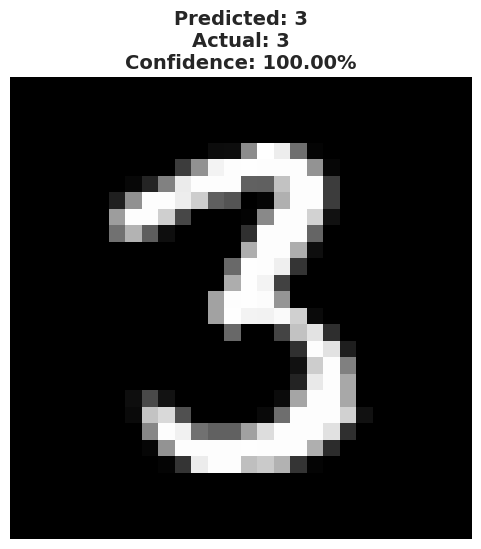


Probability Distribution:
------------------------------
Digit 0:  0.00% 
Digit 1:  0.00% 
Digit 2:  0.00% 
Digit 3: 100.00% █████████████████████████████████████████████████
Digit 4:  0.00% 
Digit 5:  0.00% 
Digit 6:  0.00% 
Digit 7:  0.00% 
Digit 8:  0.00% 
Digit 9:  0.00% 


In [38]:
# Function to predict a single image
def predict_digit(image_index):
    """
    Predict the digit for a given test image and display the result.

    Parameters:
    -----------
    image_index : int
        Index of the test image to predict
    """
    # Get the image and reshape for model input
    image = X_test_normalized[image_index].reshape(1, 28 * 28)

    # Make prediction
    prediction_probs = model.predict(image, verbose=0)
    predicted_digit = np.argmax(prediction_probs)
    confidence = prediction_probs[0][predicted_digit] * 100

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(X_test[image_index], cmap='gray')
    plt.title(f'Predicted: {predicted_digit}\nActual: {y_test[image_index]}\nConfidence: {confidence:.2f}%',
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()

    # Print probability distribution
    print("\nProbability Distribution:")
    print("-" * 30)
    for digit in range(10):
        prob = prediction_probs[0][digit] * 100
        bar = "█" * int(prob / 2)
        print(f"Digit {digit}: {prob:5.2f}% {bar}")

    return predicted_digit

# Test the function with a random image
random_index = np.random.randint(0, len(X_test))
print(f"Testing with image at index {random_index}:\n")
predicted = predict_digit(random_index)


Predicting image at index 42:



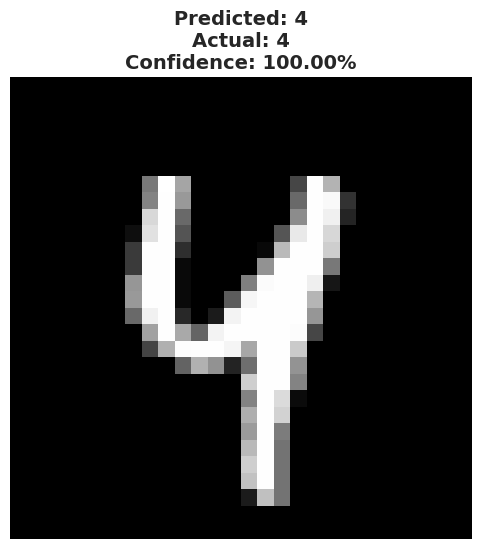


Probability Distribution:
------------------------------
Digit 0:  0.00% 
Digit 1:  0.00% 
Digit 2:  0.00% 
Digit 3:  0.00% 
Digit 4: 100.00% █████████████████████████████████████████████████
Digit 5:  0.00% 
Digit 6:  0.00% 
Digit 7:  0.00% 
Digit 8:  0.00% 
Digit 9:  0.00% 


np.int64(4)

In [39]:
test_index = 42

print(f"\nPredicting image at index {test_index}:\n")
predict_digit(test_index)

## Step 13: Model Summary and Key Insights

Let's review what we've accomplished and discuss potential improvements. Again, the variable names might be different here, so
just keep that in mind.

In [40]:
# Summary of model performance
print("\n" + "="*70)
print("🎯 MODEL PERFORMANCE SUMMARY")
print("="*70)

print(f"\n📊 Training Metrics:")
print(f"   - Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"   - Final Validation Accuracy: {final_val_acc*100:.2f}%")

print(f"\n📊 Test Set Performance:")
print(f"   - Test Accuracy: {test_accuracy*100:.2f}%")
print(f"   - Test Loss: {test_loss:.4f}")

print(f"\n🔢 Model Architecture:")
print(f"   - Total Parameters: {model.count_params():,}")
print(f"   - Hidden Layers: 2")
print(f"   - Neurons: [128, 64]")
print(f"   - Dropout Rate: 20%")

print(f"\n⚙️ Training Configuration:")
print(f"   - Epochs: 15")
print(f"   - Batch Size: 128")
print(f"   - Optimizer: Adam")
print(f"   - Loss Function: Categorical Crossentropy")

print("\n" + "="*70)


🎯 MODEL PERFORMANCE SUMMARY

📊 Training Metrics:
   - Final Training Accuracy: 98.85%
   - Final Validation Accuracy: 97.74%

📊 Test Set Performance:
   - Test Accuracy: 98.03%
   - Test Loss: 0.0745

🔢 Model Architecture:
   - Total Parameters: 109,386
   - Hidden Layers: 2
   - Neurons: [128, 64]
   - Dropout Rate: 20%

⚙️ Training Configuration:
   - Epochs: 15
   - Batch Size: 128
   - Optimizer: Adam
   - Loss Function: Categorical Crossentropy



## Conclusion

### Congratulations!

By the end of this, you've successfully:
- ✅ Loaded and explored the MNIST dataset
- ✅ Preprocessed image data for neural networks
- ✅ Built a multi-layer neural network from scratch
- ✅ Trained the model and visualized its learning process
- ✅ Evaluated performance using multiple metrics
- ✅ Made predictions on new data

### Some key takeaways:

1. **Data Preprocessing is Critical:**
   - Normalization helps neural networks learn faster
   - One-hot encoding is essential for classification tasks
   - Proper data formatting prevents training errors

2. **Model Architecture Matters:**
   - More layers/neurons ≠ better performance always
   - Dropout helps prevent overfitting
   - The right architecture depends on your problem

3. **Evaluation Goes Beyond Accuracy:**
   - Confusion matrices reveal patterns in errors
   - Precision and recall provide class-specific insights
   - Visual inspection helps understand model behavior

### Thank you for making it to the end of the second project!

Keep practicing, stay curious, and happy learning! 🚀

---

*Remember: The best way to learn machine learning is by doing. Don't be afraid to experiment, make mistakes, and iterate!*